In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Training data
X = np.array([[1,2], [2,3], [3,3], [6,5], [7,7], [8,6]])  # Features
y = np.array([0, 0, 0, 1, 1, 1])                         # Labels

# Step 2: Train KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Step 3: Predict new point
sample = np.array([[6, 5]])
prediction = knn.predict(sample)

print("Predicted class for [6,5]:", prediction)


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("btissue.csv")

print("\n--- Dataset Preview ---")
print(df.head())

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
print(df.describe())

X = df.iloc[:, :-1].values   # All columns except last
y = df.iloc[:, -1].values   # Last column

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Accuracy: 0.6875

Confusion Matrix:
 [[4 0 0 0 0 0]
 [0 6 1 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 0 1 4]
 [0 0 0 0 2 3]
 [0 0 0 0 1 4]]

Classification Report:
               precision    recall  f1-score   support

         adi       1.00      1.00      1.00         4
         car       1.00      0.86      0.92         7
         con       0.86      1.00      0.92         6
         fad       0.00      0.00      0.00         5
         gla       0.50      0.40      0.44         5
         mas       0.36      0.80      0.50         5

    accuracy                           0.69        32
   macro avg       0.62      0.68      0.63        32
weighted avg       0.64      0.69      0.65        32



c:\Users\sambi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sambi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sambi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


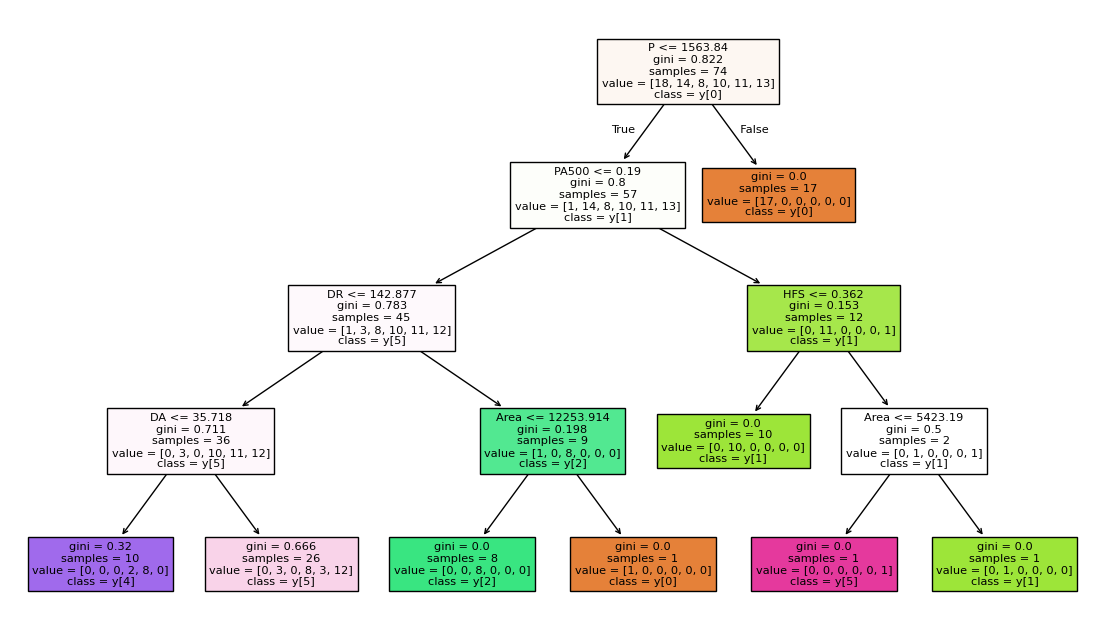

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------
df = pd.read_csv("btissue.csv")

# Features and Target
X = df.iloc[:, :-1].values   # all columns except last
y = df.iloc[:, -1].values   # last column (class label)

# --------------------------------------------------
# 2. Train-Test Split
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --------------------------------------------------
# 3. Create & Train Decision Tree
# --------------------------------------------------
dt = DecisionTreeClassifier(
    criterion="gini",     # or "entropy"
    max_depth=4,          # limit depth to avoid overfitting
    random_state=42
)

dt.fit(X_train, y_train)

# --------------------------------------------------
# 4. Prediction
# --------------------------------------------------
y_pred = dt.predict(X_test)

# --------------------------------------------------
# 5. Evaluation
# --------------------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --------------------------------------------------
# 6. Visualize Decision Tree
# --------------------------------------------------
plt.figure(figsize=(14, 8))
plot_tree(
    dt,
    feature_names=df.columns[:-1],
    class_names=True,
    filled=True
)
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# --------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------
df = pd.read_csv("btissue.csv")

X = df.iloc[:, :-1].values   # features
y = df.iloc[:, -1].values   # target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# --------------------------------------------------
# 2. Train-Test Split
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --------------------------------------------------
# 3. Feature Scaling (IMPORTANT for SVM)
# --------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------------------------
# 4. Create & Train SVM (Linear Kernel)
# --------------------------------------------------
svm_linear = SVC(kernel='linear', C=1.0)

svm_linear.fit(X_train, y_train)

# --------------------------------------------------
# 5. Prediction
# --------------------------------------------------
y_pred = svm_linear.predict(X_test)

# --------------------------------------------------
# 6. Evaluation
# --------------------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Feature shape: (106, 9)
Target shape: (106,)
Accuracy: 0.75

Confusion Matrix:
 [[4 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 1 5 0 0 0]
 [0 0 0 3 0 2]
 [0 0 0 1 3 1]
 [0 0 0 0 3 2]]

Classification Report:
               precision    recall  f1-score   support

         adi       1.00      1.00      1.00         4
         car       0.88      1.00      0.93         7
         con       1.00      0.83      0.91         6
         fad       0.75      0.60      0.67         5
         gla       0.50      0.60      0.55         5
         mas       0.40      0.40      0.40         5

    accuracy                           0.75        32
   macro avg       0.75      0.74      0.74        32
weighted avg       0.76      0.75      0.75        32



In [7]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------
df = pd.read_csv("btissue.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# --------------------------------------------------
# 2. Train-Test Split
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --------------------------------------------------
# 3. Feature Scaling (MANDATORY)
# --------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------------------------
# 4. HARD-MARGIN SVM (Linear Kernel)
# --------------------------------------------------
svm_hard = SVC(
    kernel='linear',
    C=1e6        # very large C ≈ hard margin
)

svm_hard.fit(X_train, y_train)

# --------------------------------------------------
# 5. Prediction & Evaluation
# --------------------------------------------------
y_pred = svm_hard.predict(X_test)

print("Accuracy (Hard Margin SVM):", accuracy_score(y_test, y_pred))


Accuracy (Hard Margin SVM): 0.8125


In [8]:
X = np.array([[1,1], [2,2], [3,3], [6,6], [7,7], [8,8]])
y = np.array([0,0,0,1,1,1])

svm = SVC(kernel='linear', C=1e6)
svm.fit(X, y)


SVC(C=1000000.0, kernel='linear')

In [9]:
print("Number of support vectors:", svm_hard.n_support_)
print("Support vectors per class:", svm_hard.support_vectors_.shape)


Number of support vectors: [ 5  5  6  9  9 12]
Support vectors per class: (46, 9)


In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------
df = pd.read_csv("btissue.csv")

X = df.iloc[:, :-1].values   # features
y = df.iloc[:, -1].values   # target

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

# --------------------------------------------------
# 2. Train-Test Split
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --------------------------------------------------
# 3. Feature Scaling (VERY IMPORTANT for KNN)
# --------------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------------------------
# 4. Create & Train KNN
# --------------------------------------------------
k = 5   # number of nearest neighbors

knn = KNeighborsClassifier(
    n_neighbors=k,
    metric='euclidean'   # default distance
)

knn.fit(X_train, y_train)

# --------------------------------------------------
# 5. Prediction
# --------------------------------------------------
y_pred = knn.predict(X_test)

# --------------------------------------------------
# 6. Evaluation
# --------------------------------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Feature shape: (106, 9)
Target shape: (106,)
Accuracy: 0.75

Confusion Matrix:
 [[4 0 0 0 0 0]
 [0 7 0 0 0 0]
 [1 0 5 0 0 0]
 [0 0 0 2 1 2]
 [0 0 0 1 3 1]
 [0 0 0 1 1 3]]

Classification Report:
               precision    recall  f1-score   support

         adi       0.80      1.00      0.89         4
         car       1.00      1.00      1.00         7
         con       1.00      0.83      0.91         6
         fad       0.50      0.40      0.44         5
         gla       0.60      0.60      0.60         5
         mas       0.50      0.60      0.55         5

    accuracy                           0.75        32
   macro avg       0.73      0.74      0.73        32
weighted avg       0.76      0.75      0.75        32



In [11]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Given data points
X = np.array([[1,1], [2,2], [3,3], [6,6], [7,7], [8,8]])
y = np.array([0, 0, 0, 1, 1, 1])

# Create KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train model
knn.fit(X, y)

# Predict a new point
test_point = np.array([[5, 5]])
prediction = knn.predict(test_point)

print("Predicted class for [5,5]:", prediction)


Predicted class for [5,5]: [1]


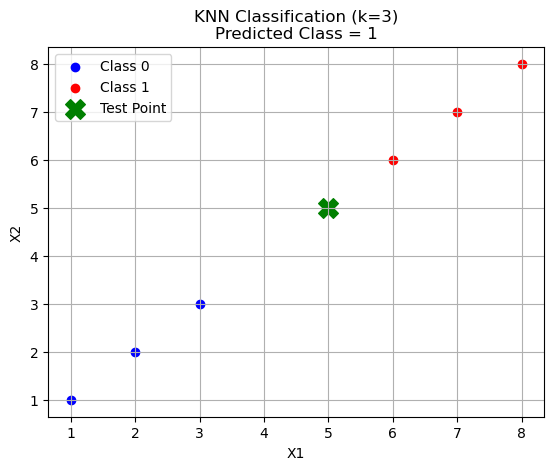

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Dataset
X = np.array([[1,1], [2,2], [3,3], [6,6], [7,7], [8,8]])
y = np.array([0, 0, 0, 1, 1, 1])

# KNN model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Test point
test_point = np.array([[5, 5]])
pred = knn.predict(test_point)

# Plot training points
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')

# Plot test point
plt.scatter(test_point[0,0], test_point[0,1],
            color='green', marker='X', s=200, label='Test Point')

# Labels & title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'KNN Classification (k={k})\nPredicted Class = {pred[0]}')
plt.legend()
plt.grid(True)

plt.show()
